In [1]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['font.size'] = 18
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
os.chdir(r'E:\BaiduSyncdisk\热浪博士论文\计算表格\Chapter3')


In [4]:
# Load the main dataset
data = pd.read_csv('BY_exposure_by_year_and_province_all_temperatures.csv')

# Create a mapping of provinces to regions based on the uploaded image description
province_to_region = {
    'Liaoning': 'Northeast China',
    'Jilin': 'Northeast China',
    'Heilongjiang': 'Northeast China',
    'Qinghai': 'Northwest China',
    'Ningxia': 'Northwest China',
    'Gansu': 'Northwest China',
    'Xinjiang': 'Northwest China',
    'Shaanxi': 'Northwest China',
    'Guizhou': 'Southwest China',
    'Yunnan': 'Southwest China',
    'Chongqing': 'Southwest China',
    'Sichuan': 'Southwest China',
    'Tibet': 'Southwest China',
    'Fujian': 'East China',
    'Jiangxi': 'East China',
    'Zhejiang': 'East China',
    'Shanghai': 'East China',
    'Anhui': 'East China',
    'Jiangsu': 'East China',
    'Shandong': 'East China',
    'Tianjin': 'North China',
    'Shanxi': 'North China',
    'Beijing': 'North China',
    'Hebei': 'North China',
    'InnerMongolia': 'North China',
    'Guangxi': 'South China',
    'Hainan': 'South China',
    'Guangdong': 'South China',
    'Hunan': 'Central China',
    'Hubei': 'Central China',
    'Henan': 'Central China'
}

# Add a new column 'Region' based on the province mapping
data['Region'] = data['Province'].map(province_to_region)

# Save the updated dataset to a new CSV file
output_path = 'BY_exposure_with_region.csv'
data.to_csv(output_path, index=False)



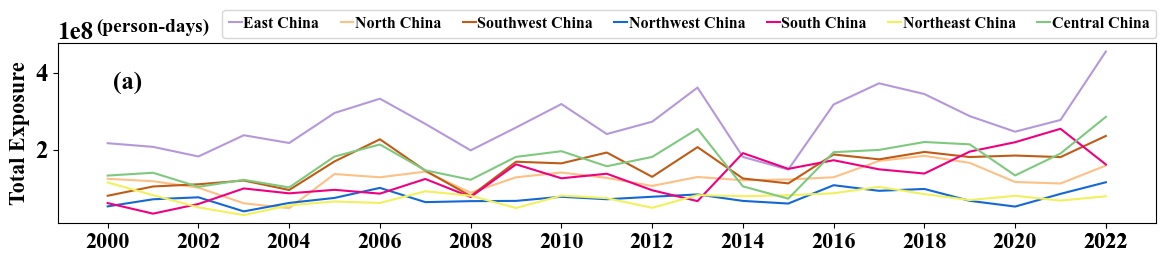

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded data
data = pd.read_csv('BY_exposure_hwf_pop_with_region.csv')  # Replace with your file path

# Step 1: Add a new column for total exposure (sum of the three age groups)
data['Total Exposure'] = data[['Age_Population_Exposure', 'Young_Population_Exposure', 'Middle_Aged_Population_Exposure']].sum(axis=1)

# Step 2: Calculate the mean total exposure across all temperature types for each region and year
mean_exposure = data.groupby(['Region', 'Year'])['Total Exposure'].sum().reset_index()

# Step 3: Define colors for each region
color_dict = {
    "East China": "#b498da",
    "North China": "#fdc086",
    "Southwest China": "#bf5b17",
    "Northwest China": "#1368d6",
    "South China": "#f0007f",
    "Northeast China": "#f1f15c",
    "Central China": "#7fc97f"
}

# Step 4: Plot the data
plt.figure(figsize=(12, 3))
plt.subplots_adjust(left=0.06, right=0.975, top=0.8, bottom=0.2)

for region, color in color_dict.items():
    region_data = mean_exposure[mean_exposure['Region'] == region]
    plt.plot(region_data['Year'], region_data['Total Exposure'], label=region, color=color)

# Add legend
leg = plt.legend(fontsize=11.5, bbox_to_anchor=(0.15, 1.03, 0.85, 0.12), loc='lower left', handletextpad=0.1,
                  ncol=10, mode="expand", borderaxespad=0., handlelength=0.8)

# Add text annotations
plt.text(0.05, 0.78, '(a)', va='center', fontsize=18, transform=plt.gca().transAxes)
plt.text(0.035, 1.09, '(person-days)', va='center', fontsize=14, transform=plt.gca().transAxes)

# Add y-axis label
plt.ylabel('Total Exposure', fontsize=16)
# Set x-axis ticks: Show only the first year, last year, and every 3rd year
years = range(2000, 2023)  # All years in the dataset
selected_years = [years[0]] + list(years[2::2]) + [years[-1]]  # First, every 3rd year, and last
plt.xticks(selected_years, fontsize=16)

# Save the plot
plt.savefig( r'E:\BaiduSyncdisk\热浪博士论文\论文图片\PD-03-10-热浪暴露区域差异-ALL-sum.png', dpi=400, facecolor="none", transparent=True)
plt.show()


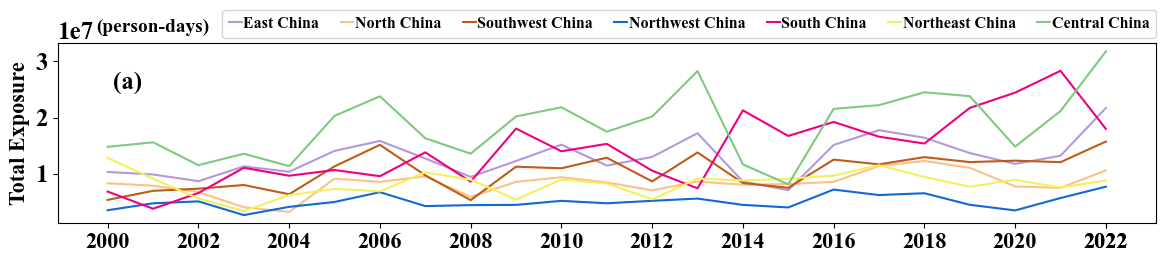

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded data
data = pd.read_csv('BY_exposure_hwf_pop_with_region.csv')  # Replace with your file path

# Step 1: Add a new column for total exposure (sum of the three age groups)
data['Total Exposure'] = data[['Age_Population_Exposure', 'Young_Population_Exposure', 'Middle_Aged_Population_Exposure']].sum(axis=1)

# Step 2: Calculate the mean total exposure across all temperature types for each region and year
mean_exposure = data.groupby(['Region', 'Year'])['Total Exposure'].mean().reset_index()

# Step 3: Define colors for each region
color_dict = {
    "East China": "#b498da",
    "North China": "#fdc086",
    "Southwest China": "#bf5b17",
    "Northwest China": "#1368d6",
    "South China": "#f0007f",
    "Northeast China": "#f1f15c",
    "Central China": "#7fc97f"
}

# Step 4: Plot the data
plt.figure(figsize=(12, 3))
plt.subplots_adjust(left=0.06, right=0.975, top=0.8, bottom=0.2)

for region, color in color_dict.items():
    region_data = mean_exposure[mean_exposure['Region'] == region]
    plt.plot(region_data['Year'], region_data['Total Exposure'], label=region, color=color)

# Add legend
leg = plt.legend(fontsize=11.5, bbox_to_anchor=(0.15, 1.03, 0.85, 0.12), loc='lower left', handletextpad=0.1,
                  ncol=10, mode="expand", borderaxespad=0., handlelength=0.8)

# Add text annotations
plt.text(0.05, 0.78, '(a)', va='center', fontsize=18, transform=plt.gca().transAxes)
plt.text(0.035, 1.09, '(person-days)', va='center', fontsize=14, transform=plt.gca().transAxes)

# Add y-axis label
plt.ylabel('Total Exposure', fontsize=16)
# Set x-axis ticks: Show only the first year, last year, and every 3rd year
years = range(2000, 2023)  # All years in the dataset
selected_years = [years[0]] + list(years[2::2]) + [years[-1]]  # First, every 3rd year, and last
plt.xticks(selected_years, fontsize=16)

# Save the plot
plt.savefig( r'E:\BaiduSyncdisk\热浪博士论文\论文图片\PD-03-10-热浪暴露区域差异-ALL.png', dpi=400, facecolor="none", transparent=True)
plt.show()


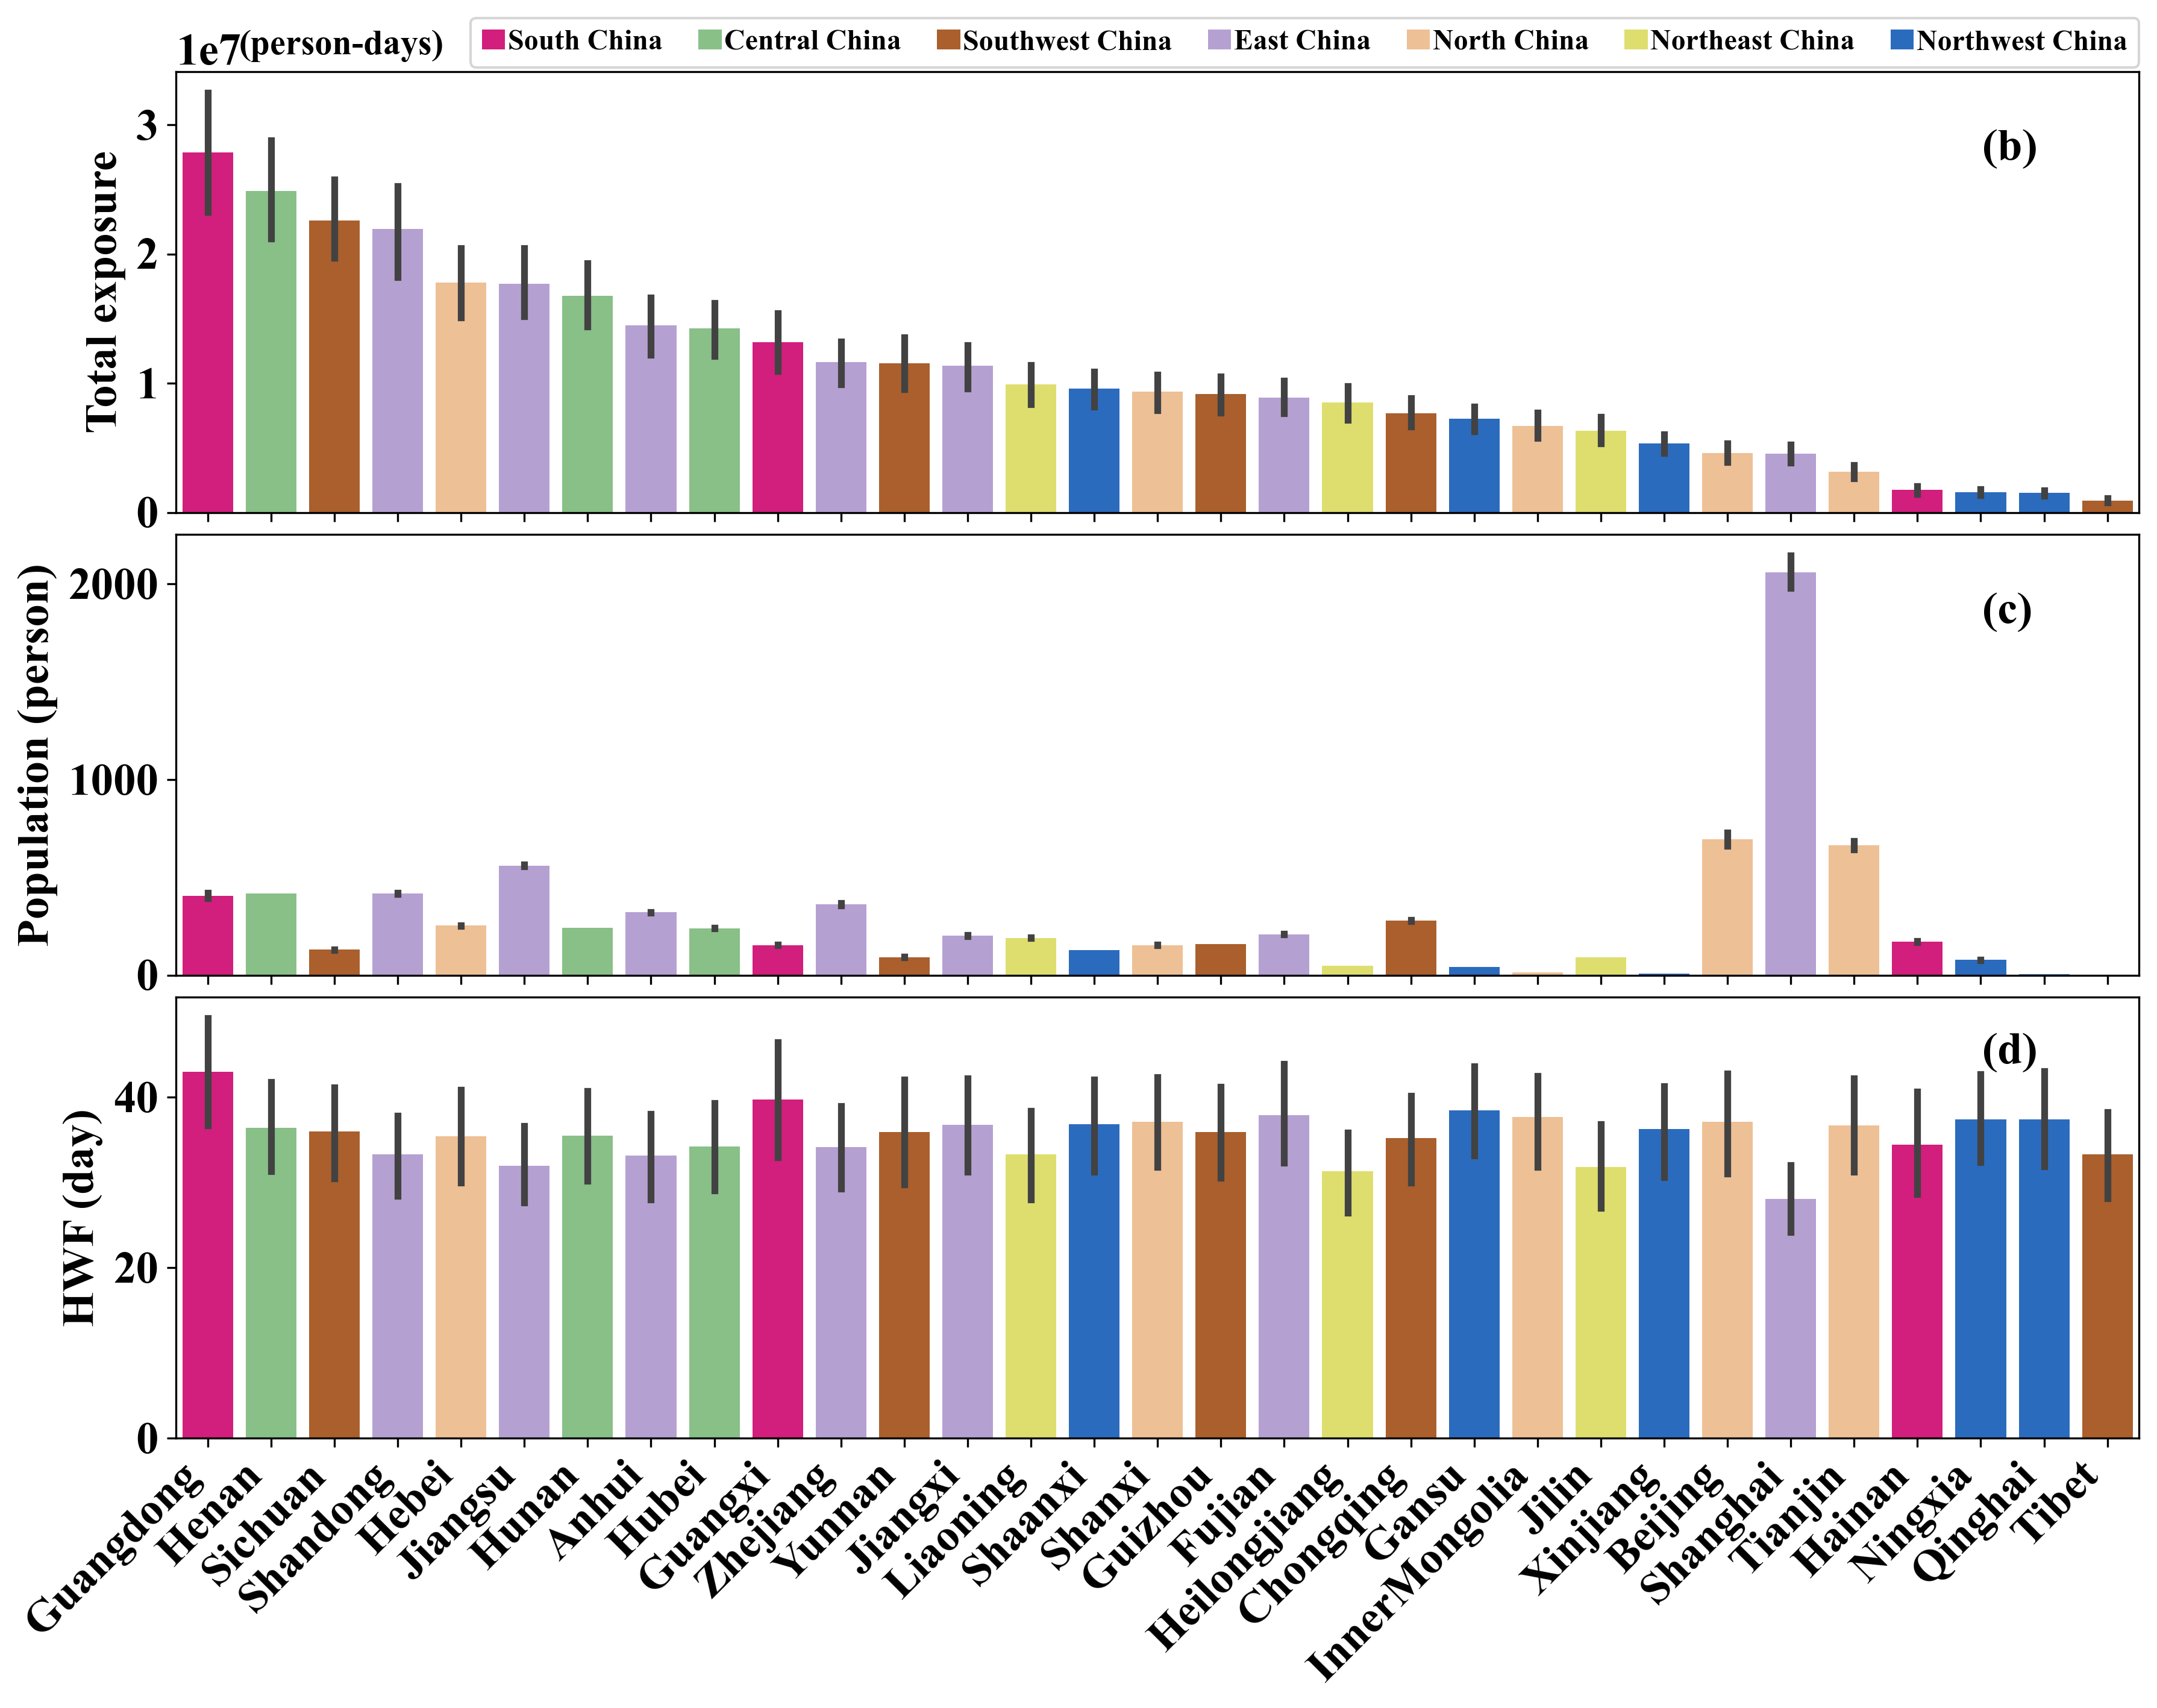

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the uploaded data
data = pd.read_csv('BY_exposure_hwf_pop_with_region.csv')

# Add a new column for total exposure (sum of the three age groups)
data['Total Exposure'] = data[['Age_Population_Exposure', 'Young_Population_Exposure', 'Middle_Aged_Population_Exposure']].sum(axis=1)

# Define a custom function to calculate the median value (mean in this case)
def get_median(group):
    return group['Total Exposure'].mean()

# Calculate the mean exposure and sort the data by province
sorted_data = data.groupby('Province').apply(get_median).sort_values(ascending=False).reset_index()
sorted_data.rename(columns={0: 'Mean Total Exposure'}, inplace=True)
sorted_df = data.set_index('Province').loc[sorted_data['Province']].reset_index()

# Define colors for each region
color_dict = {
    "East China": "#b498da",
    "North China": "#fdc086",
    "Southwest China": "#bf5b17",
    "Northwest China": "#1368d6",
    "South China": "#f0007f",
    "Northeast China": "#f1f15c",
    "Central China": "#7fc97f"
}

# Sort the data frame based on the sorted provinces
sorted_df['Province'] = pd.Categorical(sorted_df['Province'], categories=sorted_data['Province'], ordered=True)
sorted_df = sorted_df.sort_values('Province')

# Create the figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 9), dpi=300, sharex=True)
plt.subplots_adjust(hspace=0.05)
plt.subplots_adjust(left=0.07, right=0.975, top=0.95, bottom=0.11)

# Create the first barplot: Total exposure
sns.barplot(x="Province", y="Total Exposure", data=sorted_df, hue='Region', palette=color_dict, dodge=False, ax=ax1)
ax1.get_legend().remove()
ax1.set_ylabel('Total exposure')
ax1.set_xlabel('')

# Create the second barplot: Mean population
sns.barplot(x="Province", y="Population", data=sorted_df, hue='Region', palette=color_dict, dodge=False, ax=ax2)
ax2.get_legend().remove()
ax2.set_ylabel('Population (person)')
ax2.set_xlabel('')

# Create the third barplot: Heat Wave Frequency
sns.barplot(x="Province", y="HWF", data=sorted_df, hue='Region', palette=color_dict, dodge=False, ax=ax3)
ax3.get_legend().remove()
ax3.set_ylabel('HWF (day)')
ax3.set_xlabel('')

# Set the x-axis labels
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# Add annotations for each subplot
ax1.text(0.032, 1.04, '(person-days)', transform=ax1.transAxes, size=14, weight='bold')
ax1.text(0.92, 0.8, '(b)', transform=ax1.transAxes, size=18, weight='bold')
ax2.text(0.92, 0.8, '(c)', transform=ax2.transAxes, size=18, weight='bold')
ax3.text(0.92, 0.85, '(d)', transform=ax3.transAxes, size=18, weight='bold')

# Create a legend for the regions
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=color, label=region) for region, color in color_dict.items()]
leg = plt.legend(fontsize=11.5, bbox_to_anchor=(0.15, 3.11, 0.85, 0.12), loc='lower left', handletextpad=0.1,
                 ncol=10, mode="expand", borderaxespad=0., handlelength=0.8)

# Save and show the plot
output_plot_path = r'E:\BaiduSyncdisk\热浪博士论文\论文图片\PD-03-10-热浪暴露区域差异-ALL-EHF,MAX,MIN-Median_Exposure_Province_Mean.png'
plt.savefig(output_plot_path, dpi=400)
plt.show()



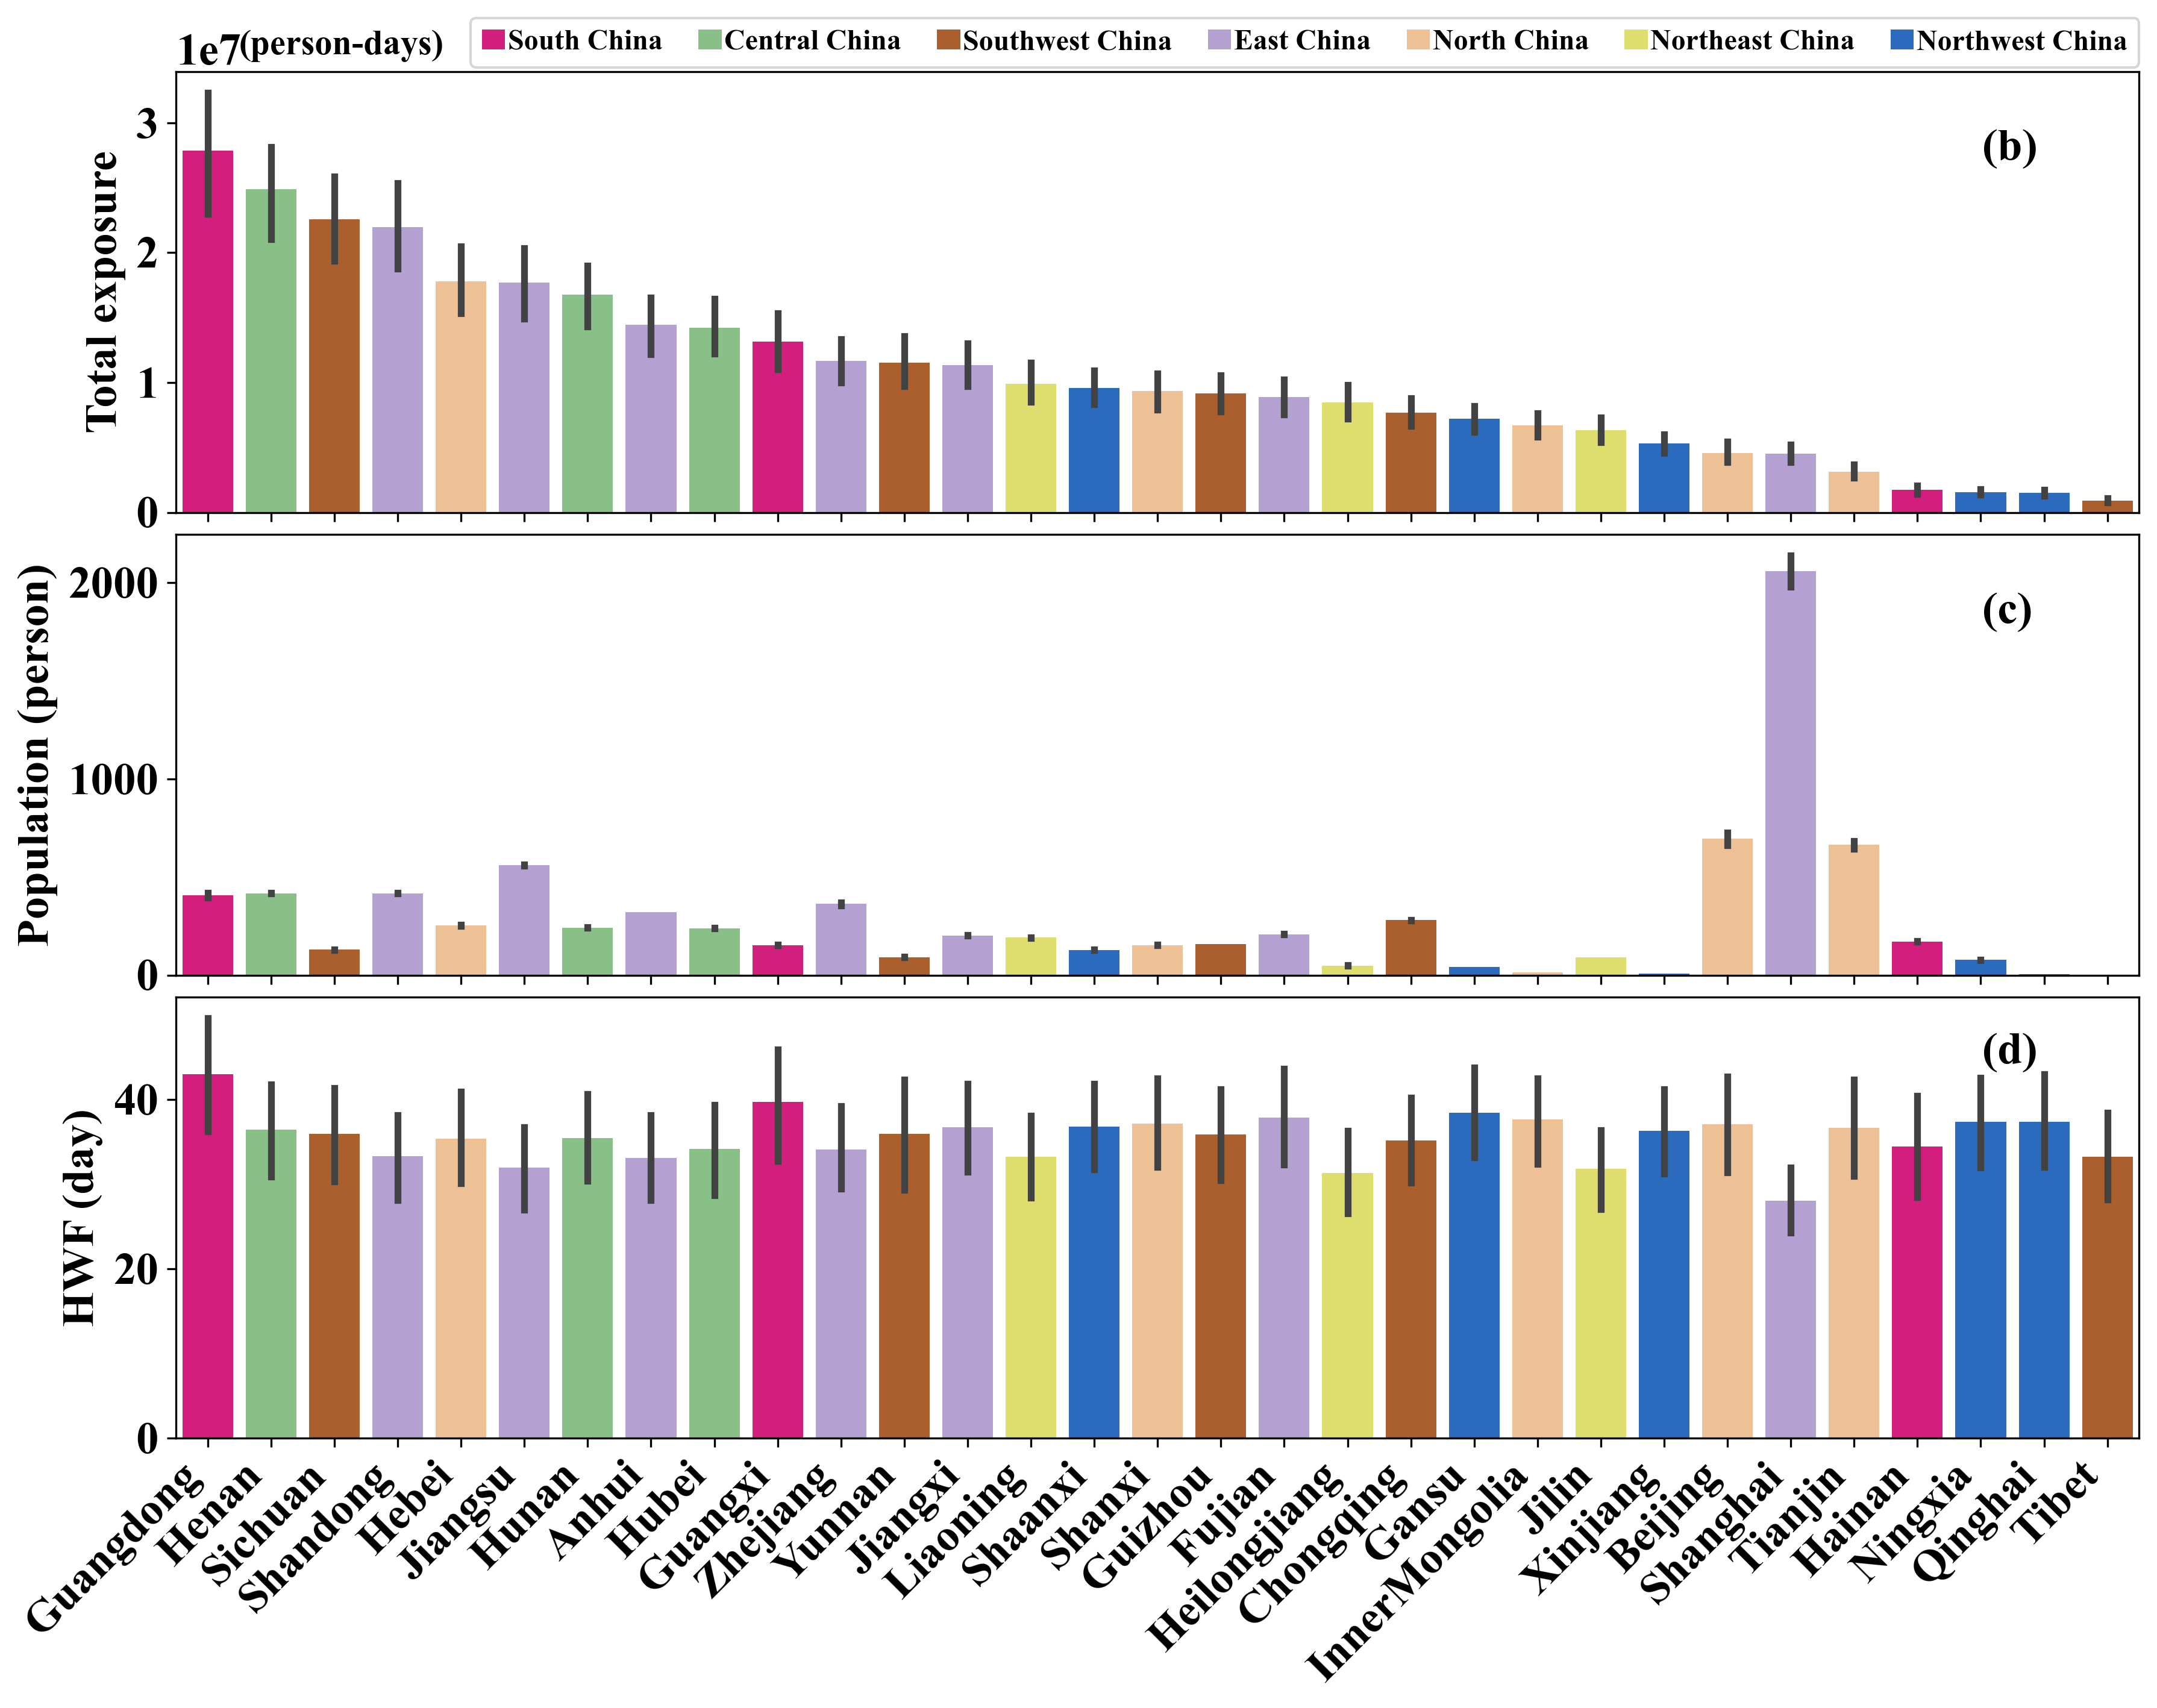

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the uploaded data
data = pd.read_csv('BY_exposure_hwf_pop_with_region.csv')

# Add a new column for total exposure (sum of the three age groups)
data['Total Exposure'] = data[['Age_Population_Exposure', 'Young_Population_Exposure', 'Middle_Aged_Population_Exposure']].sum(axis=1)
mean_exposure = data.groupby(['Province', 'Year'])['Total Exposure'].mean().reset_index()
# Define a custom function to calculate the median value (mean in this case)
def get_median(group):
    return group['Total Exposure'].mean()

# Calculate the mean exposure and sort the data by province
sorted_data = data.groupby('Province').apply(get_median).sort_values(ascending=False).reset_index()
sorted_data.rename(columns={0: 'Mean Total Exposure'}, inplace=True)
sorted_df = data.set_index('Province').loc[sorted_data['Province']].reset_index()

# Define colors for each region
color_dict = {
    "East China": "#b498da",
    "North China": "#fdc086",
    "Southwest China": "#bf5b17",
    "Northwest China": "#1368d6",
    "South China": "#f0007f",
    "Northeast China": "#f1f15c",
    "Central China": "#7fc97f"
}

# Sort the data frame based on the sorted provinces
sorted_df['Province'] = pd.Categorical(sorted_df['Province'], categories=sorted_data['Province'], ordered=True)
sorted_df = sorted_df.sort_values('Province')

# Create the figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 9), dpi=300, sharex=True)
plt.subplots_adjust(hspace=0.05)
plt.subplots_adjust(left=0.07, right=0.975, top=0.95, bottom=0.11)

# Create the first barplot: Total exposure
sns.barplot(x="Province", y="Total Exposure", data=sorted_df, hue='Region', palette=color_dict, dodge=False, ax=ax1)
ax1.get_legend().remove()
ax1.set_ylabel('Total exposure')
ax1.set_xlabel('')

# Create the second barplot: Mean population
sns.barplot(x="Province", y="Population", data=sorted_df, hue='Region', palette=color_dict, dodge=False, ax=ax2)
ax2.get_legend().remove()
ax2.set_ylabel('Population (person)')
ax2.set_xlabel('')

# Create the third barplot: Heat Wave Frequency
sns.barplot(x="Province", y="HWF", data=sorted_df, hue='Region', palette=color_dict, dodge=False, ax=ax3)
ax3.get_legend().remove()
ax3.set_ylabel('HWF (day)')
ax3.set_xlabel('')

# Set the x-axis labels
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# Add annotations for each subplot
ax1.text(0.032, 1.04, '(person-days)', transform=ax1.transAxes, size=14, weight='bold')
ax1.text(0.92, 0.8, '(b)', transform=ax1.transAxes, size=18, weight='bold')
ax2.text(0.92, 0.8, '(c)', transform=ax2.transAxes, size=18, weight='bold')
ax3.text(0.92, 0.85, '(d)', transform=ax3.transAxes, size=18, weight='bold')

# Create a legend for the regions
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=color, label=region) for region, color in color_dict.items()]
leg = plt.legend(fontsize=11.5, bbox_to_anchor=(0.15, 3.11, 0.85, 0.12), loc='lower left', handletextpad=0.1,
                 ncol=10, mode="expand", borderaxespad=0., handlelength=0.8)

# Save and show the plot
output_plot_path = r'E:\BaiduSyncdisk\热浪博士论文\论文图片\PD-03-10-热浪暴露区域差异-ALL-EHF,MAX,MIN-Median_Exposure_Province_Mean_0726.png'
plt.savefig(output_plot_path, dpi=400)
plt.show()



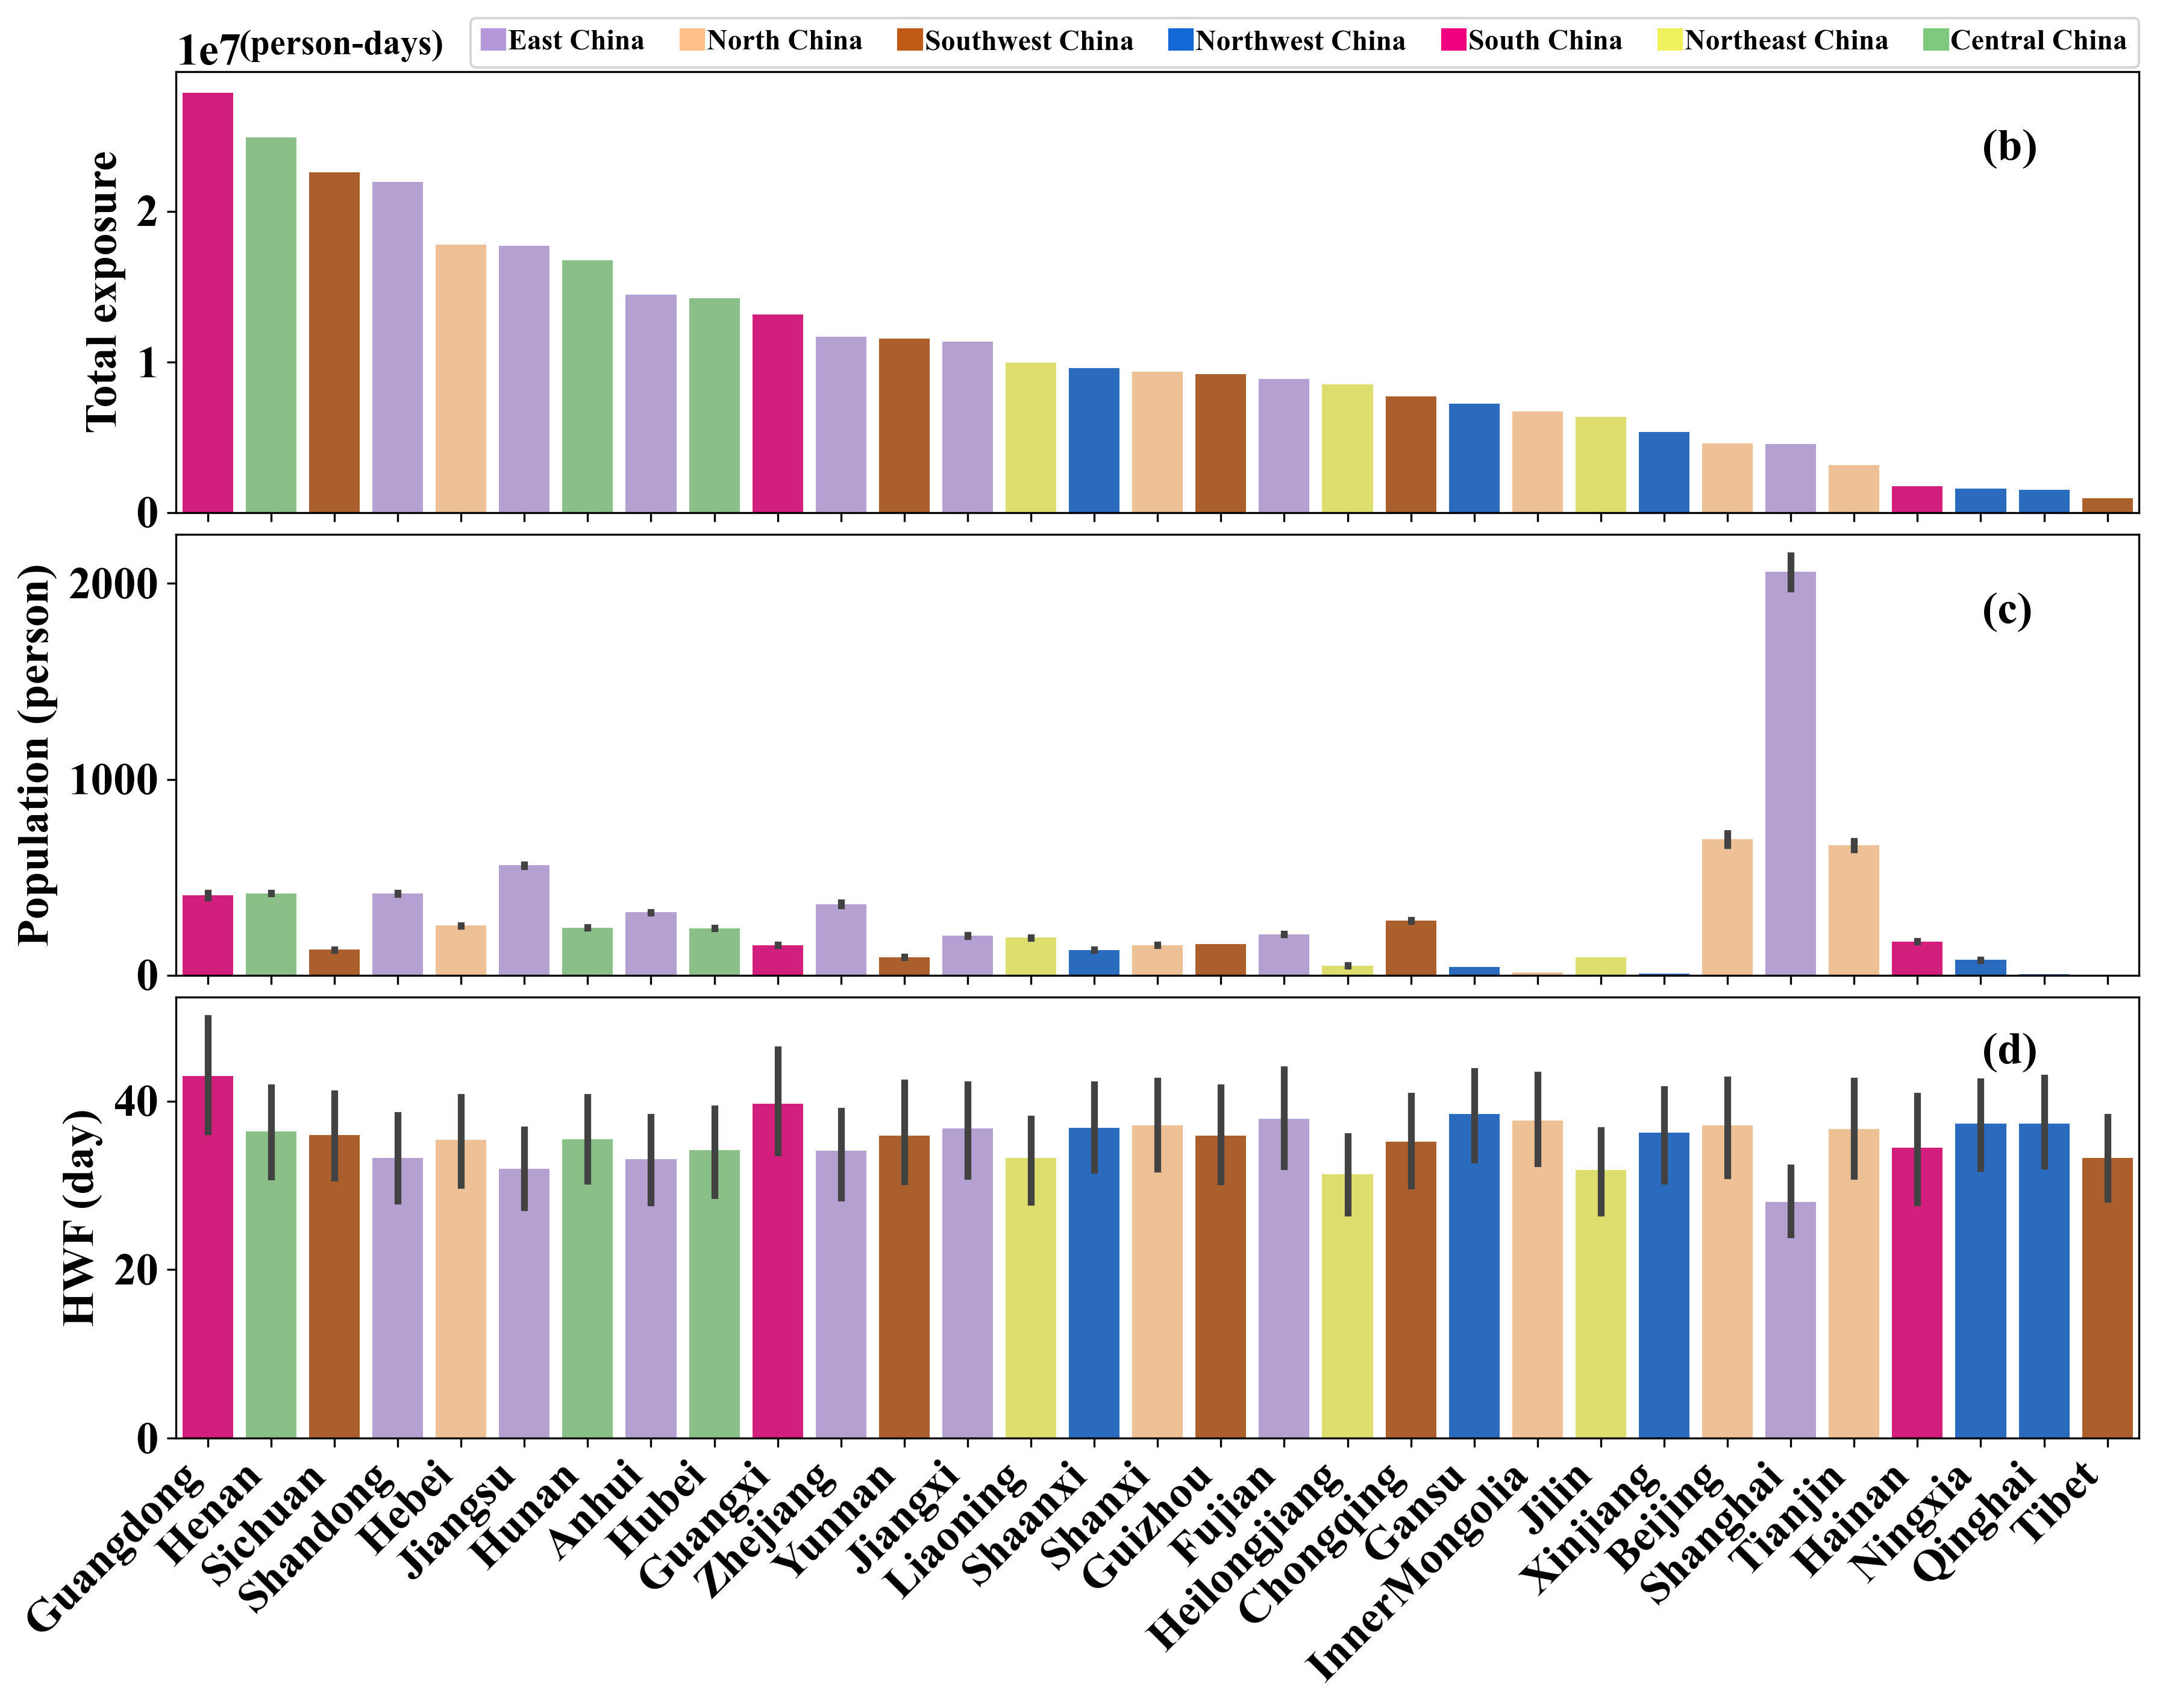

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Load the uploaded data
data = pd.read_csv('BY_exposure_hwf_pop_with_region.csv')

# Add a new column for total exposure (sum of the three age groups)
data['Total Exposure'] = data[['Age_Population_Exposure', 'Young_Population_Exposure', 'Middle_Aged_Population_Exposure']].sum(axis=1)

# Calculate mean exposure per province per year
mean_exposure = data.groupby(['Province', 'Year'])['Total Exposure'].mean().reset_index()

# Calculate the final mean Total Exposure per province (averaged over years)
province_mean_exposure = mean_exposure.groupby('Province')['Total Exposure'].mean().reset_index()
province_mean_exposure.rename(columns={'Total Exposure': 'Mean Total Exposure'}, inplace=True)

# Define colors for each region
color_dict = {
    "East China": "#b498da",
    "North China": "#fdc086",
    "Southwest China": "#bf5b17",
    "Northwest China": "#1368d6",
    "South China": "#f0007f",
    "Northeast China": "#f1f15c",
    "Central China": "#7fc97f"
}

# Add region info to the mean exposure dataframe
province_mean_exposure = pd.merge(province_mean_exposure, data[['Province', 'Region']].drop_duplicates(), on='Province')

# Sort provinces by exposure
sorted_data = province_mean_exposure.sort_values('Mean Total Exposure', ascending=False).reset_index(drop=True)
province_mean_exposure['Province'] = pd.Categorical(province_mean_exposure['Province'], categories=sorted_data['Province'], ordered=True)
province_mean_exposure = province_mean_exposure.sort_values('Province')

# Sort full data (for population and HWF plots)
sorted_df = data.set_index('Province').loc[sorted_data['Province']].reset_index()
sorted_df['Province'] = pd.Categorical(sorted_df['Province'], categories=sorted_data['Province'], ordered=True)
sorted_df = sorted_df.sort_values('Province')

# Create the figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 9), dpi=300, sharex=True)
plt.subplots_adjust(hspace=0.05)
plt.subplots_adjust(left=0.07, right=0.975, top=0.95, bottom=0.11)

# First subplot: Mean Total Exposure
sns.barplot(x="Province", y="Mean Total Exposure", data=province_mean_exposure, hue='Region',
            palette=color_dict, dodge=False, ax=ax1)
ax1.get_legend().remove()
ax1.set_ylabel('Total exposure')
ax1.set_xlabel('')

# Second subplot: Mean Population
sns.barplot(x="Province", y="Population", data=sorted_df, hue='Region',
            palette=color_dict, dodge=False, ax=ax2)
ax2.get_legend().remove()
ax2.set_ylabel('Population (person)')
ax2.set_xlabel('')

# Third subplot: Mean HWF
sns.barplot(x="Province", y="HWF", data=sorted_df, hue='Region',
            palette=color_dict, dodge=False, ax=ax3)
ax3.get_legend().remove()
ax3.set_ylabel('HWF (day)')
ax3.set_xlabel('')

# Set x-axis labels rotation
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# Annotations
ax1.text(0.032, 1.04, '(person-days)', transform=ax1.transAxes, size=14, weight='bold')
ax1.text(0.92, 0.8, '(b)', transform=ax1.transAxes, size=18, weight='bold')
ax2.text(0.92, 0.8, '(c)', transform=ax2.transAxes, size=18, weight='bold')
ax3.text(0.92, 0.85, '(d)', transform=ax3.transAxes, size=18, weight='bold')

# Custom legend
legend_patches = [mpatches.Patch(color=color, label=region) for region, color in color_dict.items()]
plt.legend(handles=legend_patches, fontsize=11.5, bbox_to_anchor=(0.15, 3.11, 0.85, 0.12), loc='lower left',
           handletextpad=0.1, ncol=10, mode="expand", borderaxespad=0., handlelength=0.8)

# Save and show
output_plot_path = r'E:\BaiduSyncdisk\热浪博士论文\论文图片\PD-03-10-热浪暴露区域差异-ALL-EHF,MAX,MIN-Median_Exposure_Province_Mean_0726.png'
plt.savefig(output_plot_path, dpi=400)
plt.show()
